In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

font = {"family": "sans-serif", "weight": "normal", "size": 15}

matplotlib.rc("font", **font)

In [2]:
bigearthnet = [
    ("MoCo - BigEarthNet - MSI", 5.52),
    ("MoCo - BigEarthNet - RGB", 4.17),
    ("ImageNet - BigEarthNet - MSI", 2.92),
    ("ImageNet - BigEarthNet - RGB", 2.45),
    #("Random init. - BigEarthNet - MSI", 5.14),
    #("Random init. - BigEarthNet - RGB", 4.98),
    #("RCF - BigEarthNet - MSI", 0.11),
    #("RCF - BigEarthNet - RGB", -0.20),
    #("MOSAIKS - BigEarthNet - MSI", 0.11),
    #("MOSAIKS - BigEarthNet - RGB", -4.33),
]

eurosat = [
    ("MoCo - EuroSAT - MSI", 93.65 - 81.85),
    ("MoCo - EuroSAT - RGB", 95.76 - 94.11),
    #("SeCo - EuroSAT - RGB", 87.57 - 82.31),
    ("ImageNet - EuroSAT - MSI", 89.81 - 78.65),
    ("ImageNet - EuroSAT - RGB", 91.17 - 82.09),
    #("Random init. - EuroSAT - MSI", 87.19 - 75.10),
    #("Random init. - EuroSAT - RGB", 73.76 - 59.92),
    #("RCF - EuroSAT - MSI", 87.41 - 87.56),
    #("RCF - EuroSAT - RGB", 76.90 - 78.85),
    #("MOSAIKS - EuroSAT - MSI", 90.14 - 91.1),
    #("MOSAIKS - EuroSAT - RGB", 77.88 - 81.47),
]

treesatai = [
    ("MoCo - TreeSatAI - MSI", 7.90),
    ("MoCo - TreeSatAI - RGB", 7.64),
    ("ImageNet - TreeSatAI - MSI", 10.64),
    ("ImageNet - TreeSatAI - RGB", 13.27),
    #("Random init. - TreeSatAI - MSI", 13.74),
    #("Random init. - TreeSatAI - RGB", 5.68),
    #("RCF - TreeSatAI - MSI", 0.16),
    #("RCF - TreeSatAI - RGB", -0.86),
    #("MOSAIKS - TreeSatAI - MSI", -0.30),
    #("MOSAIKS - TreeSatAI - RGB", -2.63),
]

sat6 = [
    ("MoCo - SAT-6 - RGB", 1.71),
    ("ImageNet - SAT-6 - RGB", 3.34),
    #("Random init. - SAT-6 - RGB", 6.93),
    #("RCF - SAT-6 - RGB", -0.11),
    #("MOSAIKS - SAT-6 - RGB", -0.80),
]

so2sat_random = [
    ("MoCo - So2Sat - MSI", 23.64),
    ("MoCo - So2Sat - RGB", 18.86),
    ("ImageNet - So2Sat - MSI", 32.28),
    ("ImageNet - So2Sat - RGB", 26.77),
    #("Random init. - So2Sat - MSI", 29.05),
    #("Random init. - So2Sat - RGB", 25.55),
    #("RCF - So2Sat Random - MSI", 0.32),
    #("RCF - So2Sat Random - RGB", 1.55),
    #("MOSAIKS - So2Sat - MSI", -0.17),
    #("MOSAIKS - So2Sat - RGB", -19.34),
]

so2sat_culture10 = [
    ("MoCo - So2Sat - MSI", 4.18),
    ("MoCo - So2Sat - RGB", 4.58),
    ("ImageNet - So2Sat - MSI", 8.21),
    ("ImageNet - So2Sat - RGB", 6.77),
    #("Random init. - So2Sat - MSI", 10.21),
    #("Random init. - So2Sat - RGB", 5.06),
    #("RCF - So2Sat Culture-10 - MSI", 0.13),
    #("RCF - So2Sat Culture-10 - RGB", 0.27),
    #("MOSAIKS - So2Sat - MSI", -2.65),
    #("MOSAIKS - So2Sat - RGB", -7.96),
]

deltas = bigearthnet + eurosat + treesatai + sat6 + so2sat_random #so2sat_culture10

methods = [d[0] for d in deltas]
deltas = [d[1] for d in deltas]
data = dict(method=methods, delta=deltas)
df = pd.DataFrame(data)
df = df.sort_values("delta", ascending=True).reset_index()
df

,index,method,delta
0,5,MoCo - EuroSAT - RGB,1.65
1,12,MoCo - SAT-6 - RGB,1.71
2,3,ImageNet - BigEarthNet - RGB,2.45
3,2,ImageNet - BigEarthNet - MSI,2.92
4,13,ImageNet - SAT-6 - RGB,3.34
5,1,MoCo - BigEarthNet - RGB,4.17
6,0,MoCo - BigEarthNet - MSI,5.52
7,9,MoCo - TreeSatAI - RGB,7.64
8,8,MoCo - TreeSatAI - MSI,7.90
9,7,ImageNet - EuroSAT - RGB,9.08


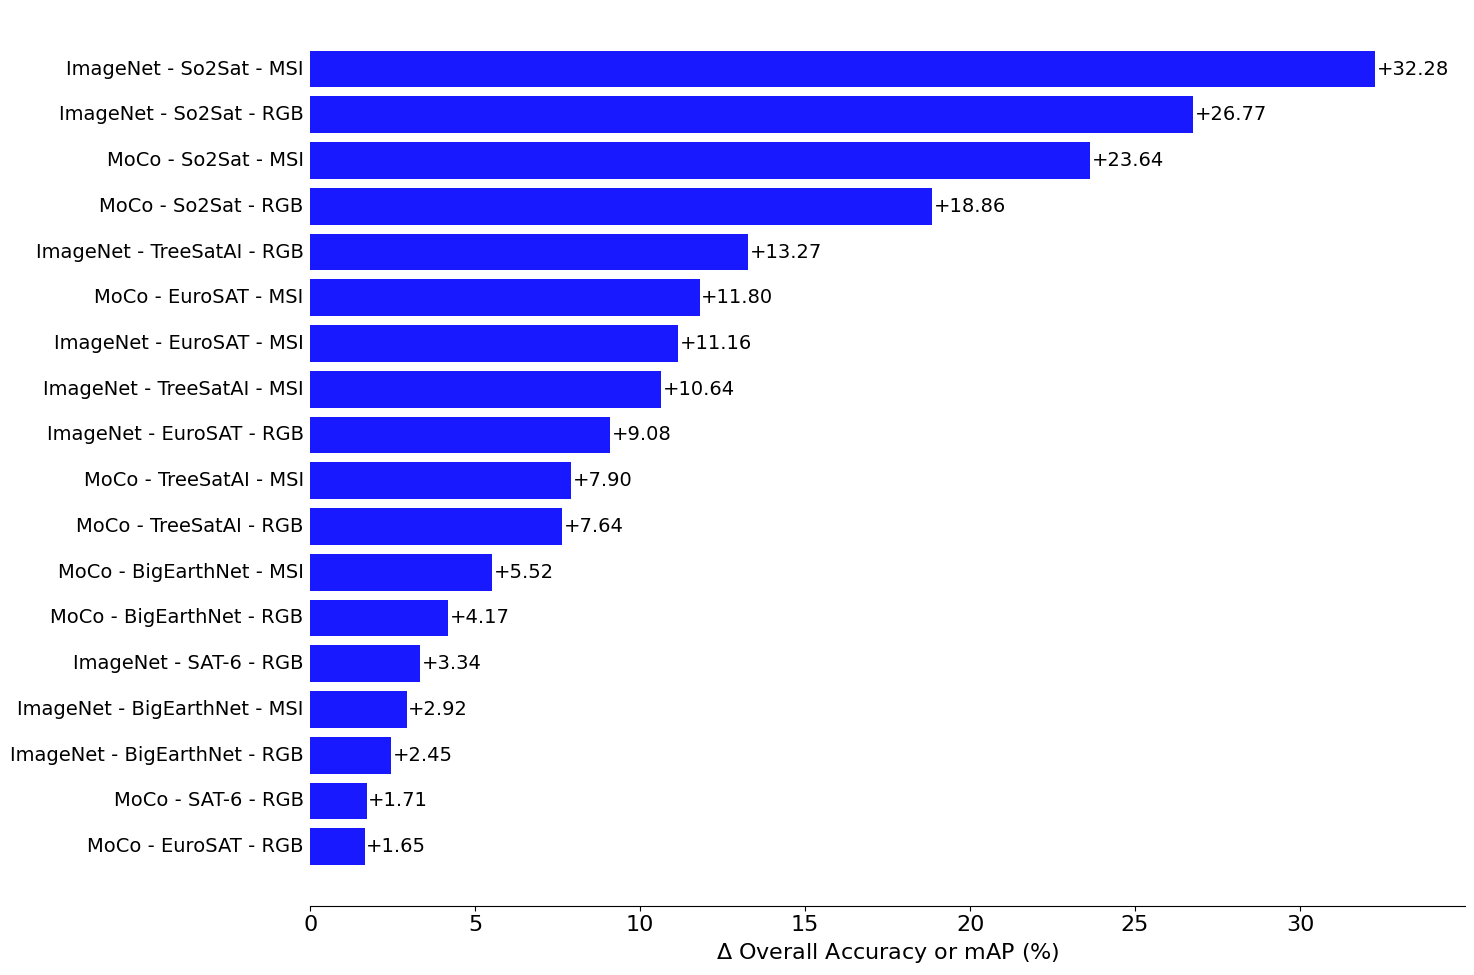

In [5]:
colors = ["blue" if x >= 0 else "red" for x in df["delta"]]
plt.figure(figsize=(15, 10))
ax = plt.barh(
    y=np.arange(len(df)),
    width=df.delta,
    color=colors,
    alpha=0.9,
    # edgecolor="k",
    linewidth=1,
)
plt.xlim([0, 35])
plt.xticks([0, 5, 10, 15, 20, 25, 30], fontsize=16)
plt.yticks([], [])
plt.xlabel(r"$\Delta$ Overall Accuracy or mAP (%)", fontsize=16)
for rect, method, delta in zip(ax.patches, df["method"], df["delta"]):
    height = rect.get_y() + rect.get_height() / 2
    width = rect.get_width()
    delta_str = (
        r"+{:.2f}".format(np.abs(delta))
        if delta >= 0
        else r"-{:.2f}".format(np.abs(delta))
    )
    delta_x = width + 0.05 if delta >= 0 else width - 0.1
    color = "black" if delta >= 0 else "black"
    ha = "left" if delta >= 0 else "right"
    plt.text(delta_x, height, delta_str, ha=ha, va="center", color=color, fontsize=14)
    ha = "right" if delta >= 0 else "left"
    method_x = 0.2 if delta < 0 else -0.2
    method_height = rect.get_y() + rect.get_height() / 2
    plt.text(method_x, height, method, ha=ha, va="center", fontsize=14)
ax = plt.gca()
ax.spines[["left", "right", "top"]].set_visible(False)
ax.yaxis.set_tick_params(labelleft=False)
plt.tight_layout()
plt.savefig("delta_plot.png", dpi=800)